In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

Looking in indexes: https://download.pytorch.org/whl/cu128
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.9/726.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
torch.__version__

In [ ]:
import torch
x = torch.rand(5,3)
print(x)

tensor([[0.2791, 0.3595, 0.9020],
        [0.1788, 0.6038, 0.6606],
        [0.6916, 0.5094, 0.1991],
        [0.0246, 0.4059, 0.1394],
        [0.5251, 0.6248, 0.6841]])


In [ ]:
import numpy as np
import math

#### before going to pytorch lets implement a simple network with just numpy. numpy is just a framework for scientific computation which know nothing about computation graphs, or deep learning, or gradients . and it just runs on cpu while tensors of pytorch and tensorflow are optimized to run on GPUs as well as CPUs. Our network will just be a network to fit a third order polynomial function to a sine function.

In [ ]:
# create equally spaced numbers within specified range - mimic x axis
x = np.linspace(-math.pi,math.pi,2000)
print(x)

[-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]


In [ ]:
# calculate the sine function
y = np.sin(x)

In [ ]:
# get random numbers in numpy for initializing random weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [ ]:
learning_rate = 1e-6

In [ ]:
for t in range(2000):
  # forward pass y = a + b* x^1 + c * x^2 + d *x^3
  y_pred = a + b*x + c* x**2 + d* x**3

  # computing the loss and lets print the loss at every 100 steps
  loss = np.square(y_pred - y).sum() # (y_pred-y)^2

  if t % 100 ==0:
    print(t,loss)

  # compute the gradients to backpropagatge the loss
  grad_a = 2.0 * (y_pred - y) .sum()
  grad_b = (2.0 * (y_pred - y)*x) .sum()
  grad_c = (2.0 * (y_pred - y)*x**2) .sum()
  grad_d = (2.0 * (y_pred - y)*x**3) .sum()

  # now lets update the weights
  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

print(f'Result : y = {a} + {b}x + {c}x^2 + {d}x^3')


0 215999.69240881337
100 538.7368663262725
200 359.2408797735404
300 240.54668317637817
400 162.05667622961505
500 110.15270703465613
600 75.82947419281678
700 53.132011302707
800 38.12244785423085
900 28.196761702180776
1000 21.632968809768037
1100 17.292354655252247
1200 14.42190709900284
1300 12.523670595174194
1400 11.268353469505955
1500 10.43819847442306
1600 9.889204348408802
1700 9.52614369477594
1800 9.286042757196453
1900 9.12725685805178
Result : y = 0.0007473971086262825 + 0.842808038444137x + -0.00012893843797960583x^2 + -0.09134856890996168x^3


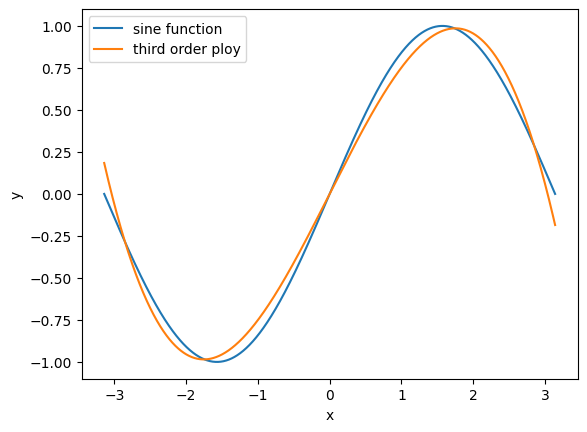

In [ ]:
# lets plot the fittings
import matplotlib.pyplot as plt
plt.plot(x,y,label='sine function')
plt.plot(x,a + b*x + c* x**2 + d* x**3, label = 'third order ploy')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### numpy is an excellent tool for scientific computation, but it cannot use the power of GPUs to accelerate the array operations. So pytorch introduces concepts of tensors which are much like numpy array but can utilize GPUs to accelerate the computation. we though need to specify the device we are using. Lets recreate above network but with tensors.

In [ ]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# for GPUs: torch.device("cuda:0")

x = torch.linspace(-math.pi,math.pi,2000, device=device,dtype=dtype)
y = torch.sin(x)

a = torch.randn((),device=device,dtype=dtype)
b = torch.randn((),device=device,dtype=dtype)
c = torch.randn((),device=device,dtype=dtype)
d = torch.randn((),device=device,dtype=dtype)

learning_rate = 1e-6
for t in range(2000):

  y_pred = a + b * x + c * x **2 + d * x **3

  loss = (y_pred - y).pow(2).sum().item() # .item() converts the tensor into a single python number, also .numpy() converts into numpy array
  if t %100 == 0:
    print(t,loss)

  grad_a = 2.0 * (y_pred - y).sum()
  grad_b = (2.0 * (y_pred - y) * x).sum()
  grad_c = (2.0 * (y_pred - y) * x**2).sum()
  grad_d = (2.0 * (y_pred - y) * x **3).sum()

  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

print(f"Result : y = {a} + {b}x + {c}x^2 + {d}x^3")

0 tensor(121896.5078)
100 tensor(4242.2627)
200 tensor(2834.3696)
300 tensor(1895.7477)
400 tensor(1269.6659)
500 tensor(851.8346)
600 tensor(572.8305)
700 tensor(386.4188)
800 tensor(261.7953)
900 tensor(178.4265)
1000 tensor(122.6186)
1100 tensor(85.2340)
1200 tensor(60.1726)
1300 tensor(43.3596)
1400 tensor(32.0714)
1500 tensor(24.4863)
1600 tensor(19.3853)
1700 tensor(15.9517)
1800 tensor(13.6385)
1900 tensor(12.0785)
Result : y = 0.029820770025253296 + 0.8200663924217224x + -0.005144580267369747x^2 + -0.08811376243829727x^3


#### here we computed gradients for our tensors manually. when the network is very large, computing them manually will be a headache. so pytorch has a method called autograd that automatically computes such gradients. These tensors which need to have gradients later should be specified with requires_grad = True, then we can just use loss.backward () which will then compute the gradient of the loss (which is a scaler ) with respect to our tensors.

In [ ]:
import torch
import math

# also when we have accelerators like GPUs, MPS (in mac) we can specify the devices as
dtype = torch.float
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"using {device}")
torch.set_default_device(device)

# creating the tensors to hold the input and output
x = torch.linspace(-math.pi,math.pi,2000,dtype=dtype) # we already have set up the device to be default
y = torch.sin(x)

# creating the parameters that would need gradients compute
a = torch.randn((),dtype=dtype, requires_grad = True)
b = torch.randn((), dtype = dtype, requires_grad = True)
c = torch.randn((), dtype = dtype, requires_grad = True)
d = torch.randn((), dtype = dtype, requires_grad = True)

learning_rate = 1e-6
for t in range (2000):
  y_pred = a + b*x + c*x**2 + d*x**3

  loss = (y_pred - y).pow(2).sum()
  if t % 100 ==99: # after 100 epochs
    print(t,loss)

  # automatically compute the gradients for backpropagation
  loss.backward() # this will compute gradients of loss with all the tensors with require_grad = True, after this our gradients will be stored in a.grad, b.grad, c.grad, d.grad

  # now after the gradients are computed, we can manually update the weights. and, these updates are involving the tensros a, b,c,d which have require_grad = True, but we dont want to keep this computation in the graph as well, so we wrap this into a troch.no_grad()
  with torch.no_grad():
    a -= learning_rate * a.grad
    b -= learning_rate * b.grad
    c -= learning_rate * c.grad
    d -= learning_rate * d.grad

    # also , the gradients tensors should be manually erased after every pass
    a.grad = None
    b.grad = None
    c.grad = None
    d.grad = None

print(f"Result : y = {a} + {b}x + {c}x^2 + {d}x^3")

using cuda
99 tensor(1032.3281, device='cuda:0', grad_fn=<SumBackward0>)
199 tensor(709.4542, device='cuda:0', grad_fn=<SumBackward0>)
299 tensor(488.9861, device='cuda:0', grad_fn=<SumBackward0>)
399 tensor(338.2689, device='cuda:0', grad_fn=<SumBackward0>)
499 tensor(235.1164, device='cuda:0', grad_fn=<SumBackward0>)
599 tensor(164.4369, device='cuda:0', grad_fn=<SumBackward0>)
699 tensor(115.9519, device='cuda:0', grad_fn=<SumBackward0>)
799 tensor(82.6542, device='cuda:0', grad_fn=<SumBackward0>)
899 tensor(59.7608, device='cuda:0', grad_fn=<SumBackward0>)
999 tensor(44.0031, device='cuda:0', grad_fn=<SumBackward0>)
1099 tensor(33.1449, device='cuda:0', grad_fn=<SumBackward0>)
1199 tensor(25.6548, device='cuda:0', grad_fn=<SumBackward0>)
1299 tensor(20.4824, device='cuda:0', grad_fn=<SumBackward0>)
1399 tensor(16.9068, device='cuda:0', grad_fn=<SumBackward0>)
1499 tensor(14.4326, device='cuda:0', grad_fn=<SumBackward0>)
1599 tensor(12.7186, device='cuda:0', grad_fn=<SumBackward0>)
